In [1]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/home/hemanth/Documents/XGBoosting/kaggle_diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [4]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0

In [5]:
df.describe().T

count       mean         std     min     25%  \
Pregnancies               2000.0    3.70350    3.306063   0.000   1.000   
Glucose                   2000.0  121.18250   32.068636   0.000  99.000   
BloodPressure             2000.0   69.14550   19.188315   0.000  63.500   
SkinThickness             2000.0   20.93500   16.103243   0.000   0.000   
Insulin                   2000.0   80.25400  111.180534   0.000   0.000   
BMI                       2000.0   32.19300    8.149901   0.000  27.375   
DiabetesPedigreeFunction  2000.0    0.47093    0.323553   0.078   0.244   
Age                       2000.0   33.09050   11.786423  21.000  24.000   
Outcome                   2000.0    0.34200    0.474498   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    40.000  130.000  744.00  
BMI                        32.300   36.800   80.60  
DiabetesPedigreeFunction    0.376    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


<AxesSubplot:>

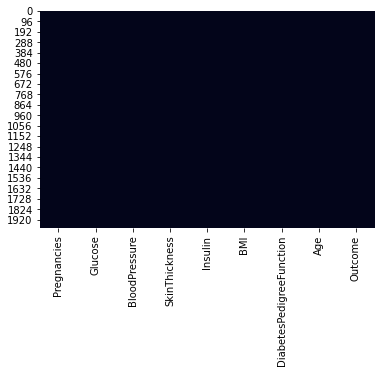

In [7]:
sns.heatmap(df.isna(),cbar=False)

# Data Visualization

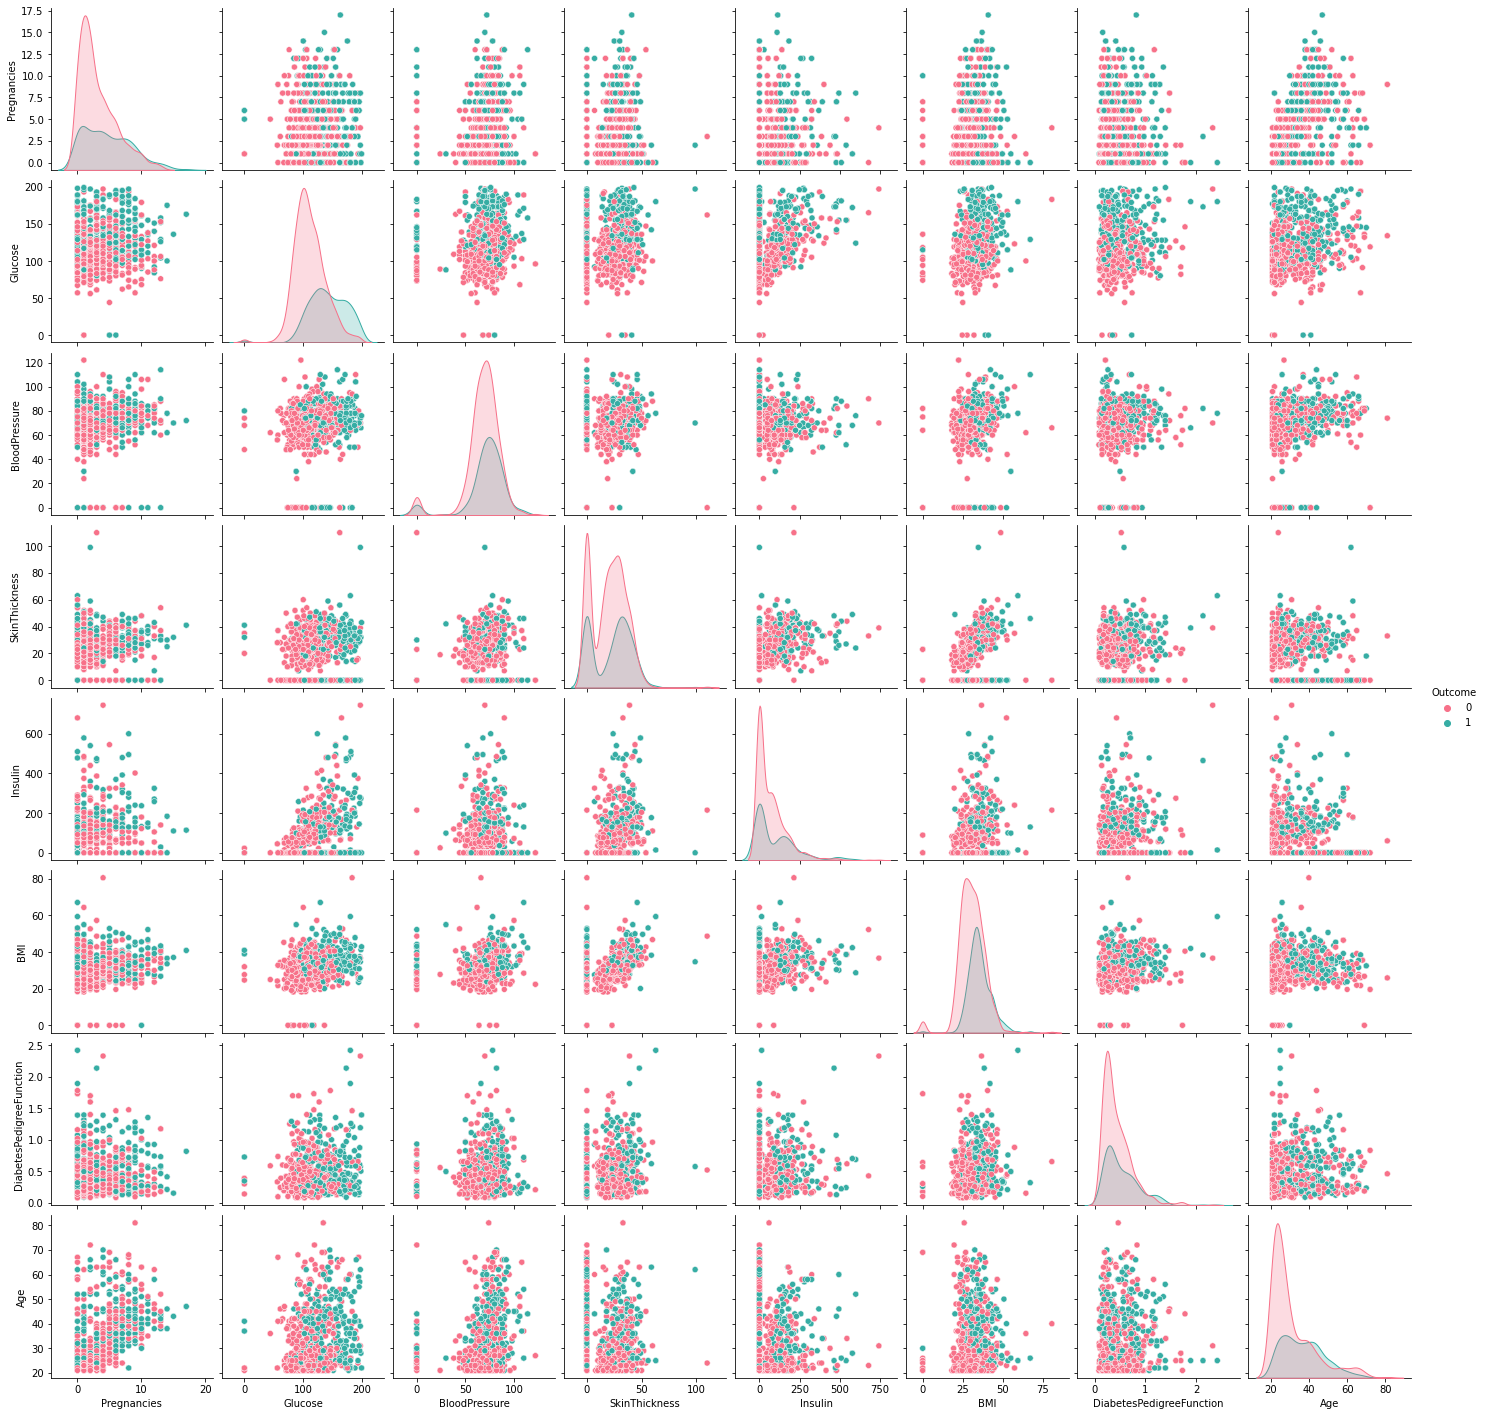

In [8]:
g = sns.pairplot(df, hue="Outcome", palette="husl")

In [13]:
df_name=df.columns


In [14]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [15]:
plotBarCat(df,df_name[0],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [16]:
plotBarCat(df,df_name[1],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [17]:
plotBarCat(df,df_name[2],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [18]:
plotBarCat(df,df_name[3],'Outcome')


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [19]:
plotBarCat(df,df_name[4],'Outcome')


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [20]:
plotBarCat(df,df_name[5],'Outcome')


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [21]:
plotBarCat(df,df_name[6],'Outcome')


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [22]:
plotBarCat(df,df_name[7],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [23]:
plotBarCat(df,df_name[8],'Outcome')


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.342
Outcome var  :  0.22503599999999999
Outcome skew :  0.6661332052171766
Outcome kurt :  -1.55626655290709
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [24]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])


In [25]:
PlotPie(df, 'Outcome')

# Outliers investigation

In [26]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")
    

In [27]:
OutLiersBox(df,df_name[0])


In [28]:
OutLiersBox(df,df_name[1])


In [29]:
OutLiersBox(df,df_name[2])


In [30]:
OutLiersBox(df,df_name[3])


In [31]:
OutLiersBox(df,df_name[4])


In [32]:
OutLiersBox(df,df_name[5])


In [33]:
OutLiersBox(df,df_name[6])


In [34]:
OutLiersBox(df,df_name[7])


In [35]:
OutLiersBox(df,df_name[8])


### Outliers investigation Pairs

In [36]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 476, 1: 1524}
Robust covariance {-1: 197, 1: 1803}
Isolation Forest {-1: 199, 1: 1801}
Local Outlier Factor {-1: 197, 1: 1803}


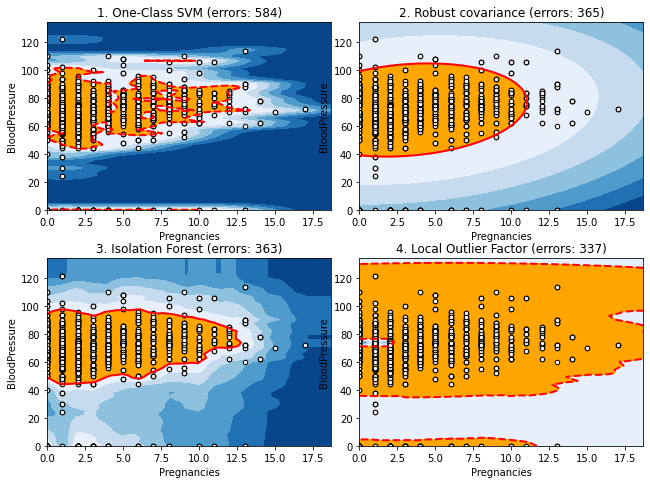

In [37]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

### Evaluate Algorithms: Baseline

In [39]:
# Load libraries
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [41]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])

## Spot-Check Algorithms

In [49]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [50]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [51]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [52]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [53]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)


LR: 0.772000 (0.029933)
LDA: 0.772667 (0.029582)
KNN: 0.778000 (0.018391)
CART: 0.940000 (0.017889)
NB: 0.754000 (0.028198)
SVM: 0.768667 (0.024775)
AB: 0.792000 (0.029933)
GBM: 0.871333 (0.029219)
RF: 0.956000 (0.016918)
ET: 0.956667 (0.017951)


In [55]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [56]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore



Model   Score
0    LR  0.7720
1   LDA  0.7727
2   KNN  0.7780
3  CART  0.9400
4    NB  0.7540
5   SVM  0.7687
6    AB  0.7920
7   GBM  0.8713
8    RF  0.9560
9    ET  0.9567

# Feature Engineering

#### Data Preprocessig

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

### Standard

In [58]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.772667 (0.026907)
standardLDA: 0.772667 (0.029582)
standardKNN: 0.802667 (0.033493)
standardCART: 0.940000 (0.022111)
standardNB: 0.754000 (0.028198)
standardSVM: 0.812667 (0.031896)
standardAB: 0.793333 (0.029364)
standardGBM: 0.872667 (0.028667)
standardRF: 0.955333 (0.014000)
standardET: 0.956667 (0.017192)


Model   Score         Model   Score
0    LR  0.7720    standardLR  0.7727
1   LDA  0.7727   standardLDA  0.7727
2   KNN  0.7780   standardKNN  0.8027
3  CART  0.9400  standardCART  0.9400
4    NB  0.7540    standardNB  0.7540
5   SVM  0.7687   standardSVM  0.8127
6    AB  0.7920    standardAB  0.7933
7   GBM  0.8713   standardGBM  0.8727
8    RF  0.9560    standardRF  0.9553
9    ET  0.9567    standardET  0.9567

### MinMax

In [59]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels


minmaxLR: 0.771333 (0.029219)
minmaxLDA: 0.772667 (0.029582)
minmaxKNN: 0.812000 (0.031524)
minmaxCART: 0.938667 (0.016813)
minmaxNB: 0.754000 (0.028198)
minmaxSVM: 0.777333 (0.029394)
minmaxAB: 0.792000 (0.029933)
minmaxGBM: 0.871333 (0.029219)
minmaxRF: 0.955333 (0.017397)
minmaxET: 0.956667 (0.018915)


Model   Score         Model   Score       Model   Score
0    LR  0.7720    standardLR  0.7727    minmaxLR  0.7713
1   LDA  0.7727   standardLDA  0.7727   minmaxLDA  0.7727
2   KNN  0.7780   standardKNN  0.8027   minmaxKNN  0.8120
3  CART  0.9400  standardCART  0.9400  minmaxCART  0.9387
4    NB  0.7540    standardNB  0.7540    minmaxNB  0.7540
5   SVM  0.7687   standardSVM  0.8127   minmaxSVM  0.7773
6    AB  0.7920    standardAB  0.7933    minmaxAB  0.7920
7   GBM  0.8713   standardGBM  0.8727   minmaxGBM  0.8713
8    RF  0.9560    standardRF  0.9553    minmaxRF  0.9553
9    ET  0.9567    standardET  0.9567    minmaxET  0.9567

# Remove Outliers

In [60]:
df_t = df.copy()
df_t_name = df_t.columns

In [61]:

def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out



In [62]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])



In [73]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])



Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 2000 samples with 9 features each.


In [74]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])



In [75]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])



Number of outliers (inc duplicates): 13 and outliers: [0 0 0 0 0 0 0 0 0 0 0 0 0]
New dataset with removed outliers has 1987 samples with 9 features each.


In [76]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])



In [77]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])



Number of outliers (inc duplicates): 113 and outliers: [  0   0 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0   0
   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0  24
   0   0   0   0 114   0   0   0   0   0   0   0   0 108   0   0   0   0
   0   0   0   0   0 110   0  24   0   0   0   0 114   0   0   0   0 122
  30   0 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 108   0   0   0   0   0   0 114   0   0   0 110   0   0   0   0
 108 122  30   0 110]
New dataset with removed outliers has 1874 samples with 9 features each.


In [78]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])



In [79]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])



In [80]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])



In [81]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])



Number of outliers (inc duplicates): 31 and outliers: [53.2  0.  52.3 52.9  0.  59.4 57.3  0.  52.9  0.  59.4 57.3  0.  52.9
 53.2  0.  52.3 59.4 80.6 64.4 50.7 52.7 80.6 64.4 50.7 52.7  0.  57.3
  0.  53.2  0. ]
New dataset with removed outliers has 1843 samples with 9 features each.


In [82]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])



In [83]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])



Number of outliers (inc duplicates): 72 and outliers: [1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 2.329 1.318 1.213 1.353
 1.224 1.391 1.476 2.137 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.182 1.391 1.476 2.137 1.268 1.6   1.191 1.251 1.699
 1.258 1.282 1.698 1.461 1.292 1.394 1.182 1.391 1.222 1.4   1.189 1.321
 1.224 2.329 1.318 1.213 1.353 1.224 1.191 2.137 1.268 1.6   1.191 1.258
 1.282 1.698 1.461 1.292 1.394 1.182 1.39  1.893 1.781 1.222 1.4   1.189]
New dataset with removed outliers has 1771 samples with 9 features each.


In [84]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])



In [85]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])



Number of outliers (inc duplicates): 34 and outliers: [67 66 69 66 67 81 67 66 67 66 70 68 66 67 81 67 66 67 66 70 68 66 69 66
 81 67 66 67 66 67 70 68 66 69]
New dataset with removed outliers has 1737 samples with 9 features each.


In [86]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])



In [87]:


df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])



Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 1737 samples with 9 features each.


### Cleaning Report 

In [88]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 2000, new df shape: 1737, we lost 263 rows, 13.15% of our data


One-Class SVM {-1: 476, 1: 1524}
Robust covariance {-1: 197, 1: 1803}
Isolation Forest {-1: 199, 1: 1801}
Local Outlier Factor {-1: 197, 1: 1803}


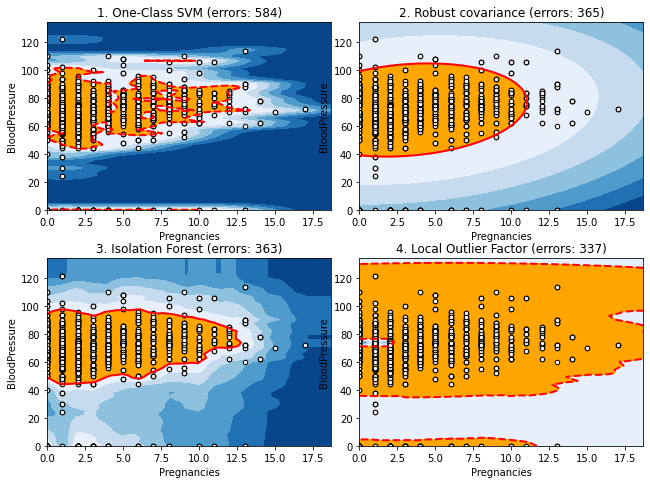

In [89]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)



One-Class SVM {-1: 426, 1: 1311}
Robust covariance {-1: 174, 1: 1563}
Isolation Forest {-1: 171, 1: 1566}
Local Outlier Factor {-1: 166, 1: 1571}


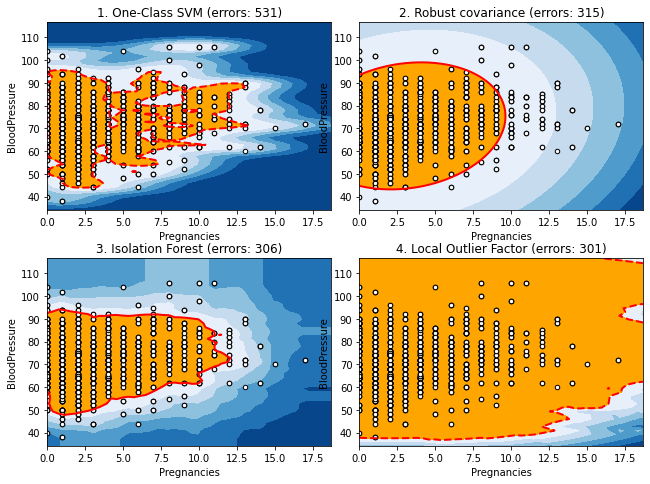

In [90]:
tt_t = OutLierDetection(df_clean,'Pregnancies','BloodPressure',.1)


### Comparing the accuracy of models after cleaning

In [91]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['Outcome'])

In [92]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

minmaxLR: 0.778855 (0.029274)
minmaxLDA: 0.771926 (0.035823)
minmaxKNN: 0.810282 (0.040963)
minmaxCART: 0.943952 (0.026072)
minmaxNB: 0.755796 (0.038293)
minmaxSVM: 0.812642 (0.036406)
minmaxAB: 0.809554 (0.019060)
minmaxGBM: 0.856400 (0.030373)
minmaxRF: 0.948567 (0.031219)
minmaxET: 0.947798 (0.030041)


Model   Score         Model   Score       Model   Score       Model   Score
0    LR  0.7720    standardLR  0.7727    minmaxLR  0.7713    minmaxLR  0.7789
1   LDA  0.7727   standardLDA  0.7727   minmaxLDA  0.7727   minmaxLDA  0.7719
2   KNN  0.7780   standardKNN  0.8027   minmaxKNN  0.8120   minmaxKNN  0.8103
3  CART  0.9400  standardCART  0.9400  minmaxCART  0.9387  minmaxCART  0.9440
4    NB  0.7540    standardNB  0.7540    minmaxNB  0.7540    minmaxNB  0.7558
5   SVM  0.7687   standardSVM  0.8127   minmaxSVM  0.7773   minmaxSVM  0.8126
6    AB  0.7920    standardAB  0.7933    minmaxAB  0.7920    minmaxAB  0.8096
7   GBM  0.8713   standardGBM  0.8727   minmaxGBM  0.8713   minmaxGBM  0.8564
8    RF  0.9560    standardRF  0.9553    minmaxRF  0.9553    minmaxRF  0.9486
9    ET  0.9567    standardET  0.9567    minmaxET  0.9567    minmaxET  0.9478

### Feature Selection

### Corrolation

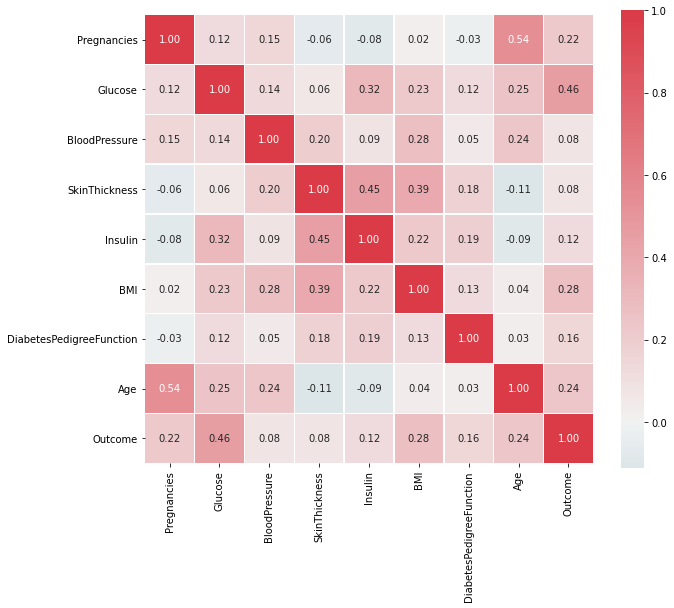

In [93]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

#### Feature Importance

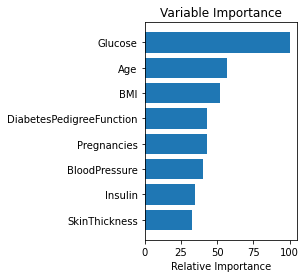

In [94]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [95]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]


In [96]:
df_feature_imp_name = df_feature_imp.columns


In [97]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [98]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

minmaxLR: 0.783097 (0.034882)
minmaxLDA: 0.785028 (0.032705)
minmaxKNN: 0.806765 (0.024036)
minmaxCART: 0.970558 (0.014401)
minmaxNB: 0.787588 (0.035426)
minmaxSVM: 0.809967 (0.035871)
minmaxAB: 0.822758 (0.038631)
minmaxGBM: 0.863045 (0.028708)
minmaxRF: 0.974400 (0.010342)
minmaxET: 0.973126 (0.011716)


Model   Score         Model   Score       Model   Score       Model   Score  \
0    LR  0.7720    standardLR  0.7727    minmaxLR  0.7713    minmaxLR  0.7789   
1   LDA  0.7727   standardLDA  0.7727   minmaxLDA  0.7727   minmaxLDA  0.7719   
2   KNN  0.7780   standardKNN  0.8027   minmaxKNN  0.8120   minmaxKNN  0.8103   
3  CART  0.9400  standardCART  0.9400  minmaxCART  0.9387  minmaxCART  0.9440   
4    NB  0.7540    standardNB  0.7540    minmaxNB  0.7540    minmaxNB  0.7558   
5   SVM  0.7687   standardSVM  0.8127   minmaxSVM  0.7773   minmaxSVM  0.8126   
6    AB  0.7920    standardAB  0.7933    minmaxAB  0.7920    minmaxAB  0.8096   
7   GBM  0.8713   standardGBM  0.8727   minmaxGBM  0.8713   minmaxGBM  0.8564   
8    RF  0.9560    standardRF  0.9553    minmaxRF  0.9553    minmaxRF  0.9486   
9    ET  0.9567    standardET  0.9567    minmaxET  0.9567    minmaxET  0.9478   

        Model   Score  
0    minmaxLR  0.7831  
1   minmaxLDA  0.7850  
2   minmaxKNN  0.8068  
3  minmaxCART  0.9706  
4    minmaxNB  0.7876  
5   minmaxSVM  0.8100  
6    minmaxAB  0.8228  
7   minmaxGBM  0.8630  
8    minmaxRF  0.9744  
9    minmaxET  0.9731

### Algortithm Tuning

In [99]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [100]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

In [101]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform



In [102]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

In [103]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

### Logistic Regression

In [104]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [105]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.789503 using {'C': 2.099197507481782, 'penalty': 'l2'}


In [106]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))



In [107]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))


prediction on test set is: 0.7931034


### KNN

In [108]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [109]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))


Best: 0.969925 using {'n_neighbors': 1}
prediction on test set is: 1.0


## SVC

In [110]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [111]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.811240 using {'C': 2.0, 'kernel': 'rbf'}
prediction on test set is: 0.8505747


## Decision Tree

In [112]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [113]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [114]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.975702 using {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}
prediction on test set is: 0.9942529


## AdaBoostClassifier

In [115]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [116]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))


Best: 0.841307 using {'learning_rate': 1, 'n_estimators': 300}
prediction on test set is: 0.8735632


### GradientBoosting

In [117]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [118]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.975041 using {'learning_rate': 1, 'n_estimators': 300}
prediction on test set is: 1.0


### Ensemble Methods

#### Voting Ensemble

In [119]:
from sklearn.ensemble import VotingClassifier



In [121]:
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [122]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]

In [123]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())


Accuracy on train:  0.8189531275518537
Accuracy on test: 0.8333333333333334


### Beyond Voting

In [127]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

### Error Corrolation

In [128]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [129]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)



Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



[MLENS] backend: threading


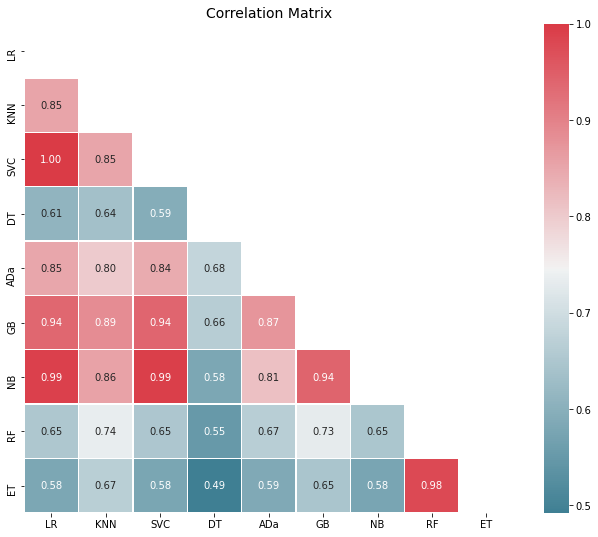

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [131]:
from mlens.visualization import corrmat
corrmat(P.corr(), inflate=False)



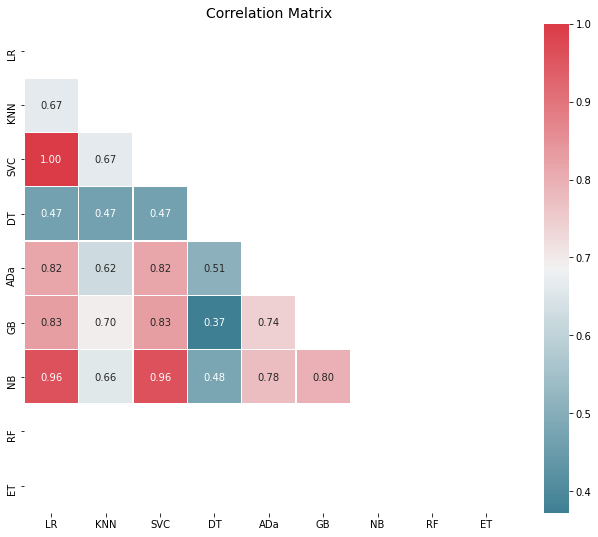

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [132]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)



#### Stacking

In [133]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [134]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_sc, y_train_sc)

# Predict the test set
p_sl = sl.predict_proba(X_test_sc)


Fitting 2 layers
Processing layer-1             done | 00:00:05
Processing layer-2             done | 00:00:01
Fit complete                        | 00:00:07

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


In [135]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)



In [136]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())




Super Learner Accuracy score: 0.97701149
